In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [4]:
file_path = '/content/drive/My Drive/annual-number-of-deaths-by-cause.csv'  # Adjust the path accordingly

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),...,Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Poisonings - Sex: Both - Age: All Ages (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Road injuries - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,4490.0,513.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


In [5]:
df.dtypes

,0
Entity,object
Code,object
Year,int64
Number of executions (Amnesty International),object
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),float64
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),float64
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),float64
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),float64
Deaths - Malaria - Sex: Both - Age: All Ages (Number),float64
Deaths - Drowning - Sex: Both - Age: All Ages (Number),float64


In [6]:
df.shape

(7273, 36)

In [7]:
df.isnull().sum()

,0
Entity,0
Code,1067
Year,0
Number of executions (Amnesty International),7006
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),433
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),433
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),433
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),433
Deaths - Malaria - Sex: Both - Age: All Ages (Number),433
Deaths - Drowning - Sex: Both - Age: All Ages (Number),433


In [8]:
# Set column2 to 'AUS' where column1 is 'Australia'
df.loc[df['Entity'] == 'African Region (WHO)', 'Code'] = 'AFR'
df.loc[df['Entity'] == 'Australasia & Oceania', 'Code'] = 'AUS'
df.loc[df['Entity'] == 'Bosnia-Herzegovina', 'Code'] = 'BIH'
df.loc[df['Entity'] == 'Central America & Caribbean', 'Code'] = 'CAMCAR'
df.loc[df['Entity'] == 'Central Asia', 'Code'] = 'Central Asia'
df.loc[df['Entity'] == 'East Asia', 'Code'] = 'East Asia'
df.loc[df['Entity'] == 'East Asia & Pacific (WB)', 'Code'] = 'EAS'
df.loc[df['Entity'] == 'East Germany (GDR)', 'Code'] = 'DD'
df.loc[df['Entity'] == 'East Timor', 'Code'] = 'EAT'
df.loc[df['Entity'] == 'Eastern Europe', 'Code'] = 'EEU'
df.loc[df['Entity'] == 'Eastern Mediterranean Region (WHO)', 'Code'] = 'EMRO'
df.loc[df['Entity'] == 'England', 'Code'] = 'GB-ENG'
df.loc[df['Entity'] == 'Europe & Central Asia (WB)', 'Code'] = 'UNEPE'
df.loc[df['Entity'] == 'European Region (WHO)', 'Code'] = 'EUR'
df.loc[df['Entity'] == 'G20', 'Code'] = 'G20'
df.loc[df['Entity'] == 'Latin America & Caribbean (WB)', 'Code'] = 'LAC '
df.loc[df['Entity'] == 'Macau', 'Code'] = 'MO'
df.loc[df['Entity'] == 'Middle East & North Africa', 'Code'] = 'MNA'
df.loc[df['Entity'] == 'Middle East & North Africa (WB)', 'Code'] = 'MNA'
df.loc[df['Entity'] == 'North America', 'Code'] = 'NAC'
df.loc[df['Entity'] == 'North America (WB)', 'Code'] = 'NAC'
df.loc[df['Entity'] == 'Northern Ireland', 'Code'] = 'GB-NIR'
df.loc[df['Entity'] == 'OECD Countries', 'Code'] = 'OECD'
df.loc[df['Entity'] == 'Region of the Americas (WHO)', 'Code'] = 'AMR'
df.loc[df['Entity'] == 'Scotland', 'Code'] = 'GB-SCT'
df.loc[df['Entity'] == 'Serbia-Montenegro', 'Code'] = 'CS'
df.loc[df['Entity'] == 'South America', 'Code'] = 'SAM'
df.loc[df['Entity'] == 'South Asia', 'Code'] = 'SAS'
df.loc[df['Entity'] == 'South Asia (WB)', 'Code'] = 'SAS'
df.loc[df['Entity'] == 'South-East Asia Region (WHO)', 'Code'] = 'SEA'
df.loc[df['Entity'] == 'Southeast Asia', 'Code'] = 'SEA'
df.loc[df['Entity'] == 'Sub-Saharan Africa', 'Code'] = 'SSA'
df.loc[df['Entity'] == 'Sub-Saharan Africa (WB)', 'Code'] = 'SSA'
df.loc[df['Entity'] == 'Wales', 'Code'] = 'GB-WLS'
df.loc[df['Entity'] == 'West Germany (FRG)', 'Code'] = 'FRG'
df.loc[df['Entity'] == 'Western Europe', 'Code'] = 'WEU'
df.loc[df['Entity'] == 'Western Pacific Region (WHO)', 'Code'] = 'WPR'
df.loc[df['Entity'] == 'World (excluding China)', 'Code'] = 'WLD-XCN'
df.loc[df['Entity'] == 'World Bank High Income', 'Code'] = 'HIC'
df.loc[df['Entity'] == 'World Bank Low Income', 'Code'] = 'LIC'
df.loc[df['Entity'] == 'World Bank Lower Middle Income', 'Code'] = 'LMIC'
df.loc[df['Entity'] == 'Zaire', 'Code'] = 'ZR'

In [9]:
df.isnull().sum()

,0
Entity,0
Code,31
Year,0
Number of executions (Amnesty International),7006
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),433
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),433
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),433
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),433
Deaths - Malaria - Sex: Both - Age: All Ages (Number),433
Deaths - Drowning - Sex: Both - Age: All Ages (Number),433


In [10]:
df['Number of executions (Amnesty International)'] = df['Number of executions (Amnesty International)'].str.replace('>', '', regex=False)

In [11]:
df['Number of executions (Amnesty International)'] = df['Number of executions (Amnesty International)'].astype(float)

In [12]:
df['Continent'] = 'Unknown'

# Loop through the DataFrame and update the 'Continent' column
for index, row in df.iterrows():
    country_name = row['Entity']

    # Handle special case for African region
    if 'Africa' in country_name:
        df.at[index, 'Continent'] = 'Africa'
    else:
        try:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
            continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
            continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            df.at[index, 'Continent'] = continent_name
        except:
            df.at[index, 'Continent'] = 'Unknown'

In [13]:
df = df.drop('Continent', axis=1)

In [14]:
categories = {
    'Terrorism': ['Terrorism (deaths)', 'Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)'],
    'Injuries': [
        'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
        'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
        'Deaths - Self-harm - Sex: Both - Age: All Ages (Number)',
        'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
        'Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)'
    ],
    'Diseases': [
        'Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)',
        'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
        'Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)',
        'Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)',
        'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
        'Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)',
        'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
        'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
        'Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)',
        'Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)',
        'Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)'
    ],
    'Nutritional and Environmental': [
        'Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)',
        'Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)',
        'Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)'
    ],
    'Mental Health': [
        'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
        'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)'
    ],
    'Maternal and Neonatal': [
        'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
        'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)'
    ]
}

In [15]:
yearly_sums = df.groupby('Year').sum()

In [16]:
death_columns = df.columns[3:-1]  # Assuming that death-related columns start from index 3 and exclude 'Death Category'
yearly_totals = yearly_sums[death_columns].sum(axis=1)

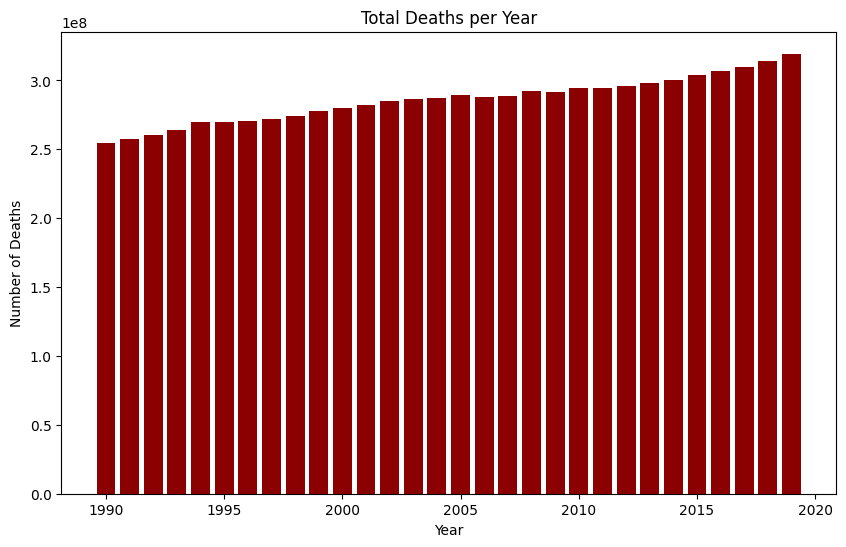

In [17]:
# Plot the data in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_totals.index, yearly_totals.values, color='darkred')

# Add labels and title
plt.title('Total Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')

# Show the plot
plt.show()

In [18]:
country_sums = df.groupby('Code').sum()

In [19]:
death_columns = df.columns[3:-1]  # Assuming that death-related columns start from index 3 and exclude 'Death Category'
country_totals = country_sums[death_columns].sum(axis=1)

In [20]:
top_10_country_totals = country_totals.nlargest(10)

In [21]:
top_10_country_totals

,0
Code,
OWID_WRL,1.465496e+09
G20,9.565154e+08
LMIC,5.513074e+08
EAS,4.282889e+08
WPR,3.511780e+08
SEA,3.457511e+08
SAS,3.137198e+08
OECD,2.860526e+08
HIC,2.704892e+08


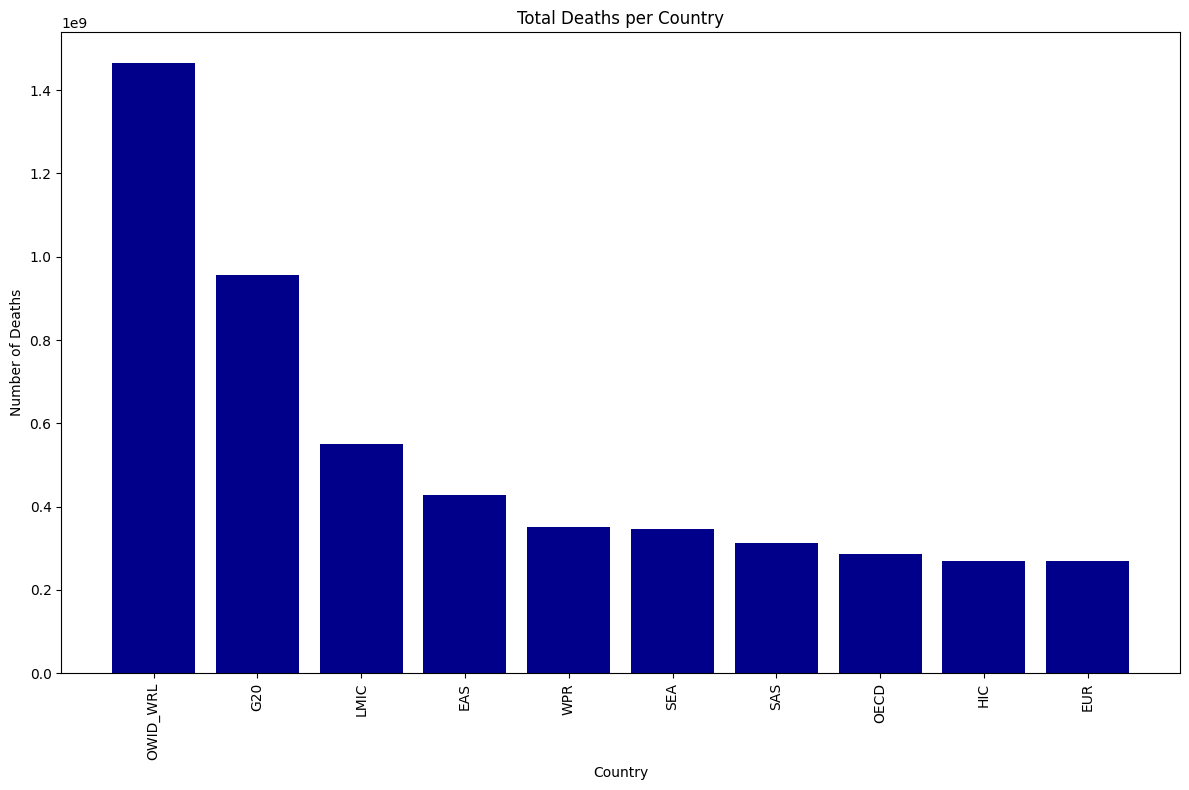

In [22]:
# Plot the data in a bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_country_totals.index, top_10_country_totals.values, color='darkblue')

# Add labels and title
plt.title('Total Deaths per Country')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Deaths')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Get the sum of each column starting from the 3rd column
sum_values = df.iloc[:, 3:].sum()  # .iloc[:, 2:-2] selects all rows and columns starting from the 3rd column




In [24]:
sum_values

,0
Number of executions (Amnesty International),2.694900e+04
Deaths - Meningitis - Sex: Both - Age: All Ages (Number),5.617794e+07
Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),1.871642e+08
Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number),4.441642e+07
Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number),7.528347e+07
Deaths - Malaria - Sex: Both - Age: All Ages (Number),1.292976e+08
Deaths - Drowning - Sex: Both - Age: All Ages (Number),5.895434e+07
Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),7.275468e+07
Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number),4.193651e+07
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),1.924862e+08


In [25]:
sum_df = sum_values.reset_index()  # Convert Series to DataFrame and reset the index
sum_df.columns = ['Cause of Death', 'Total Deaths']  # Rename columns for clarity

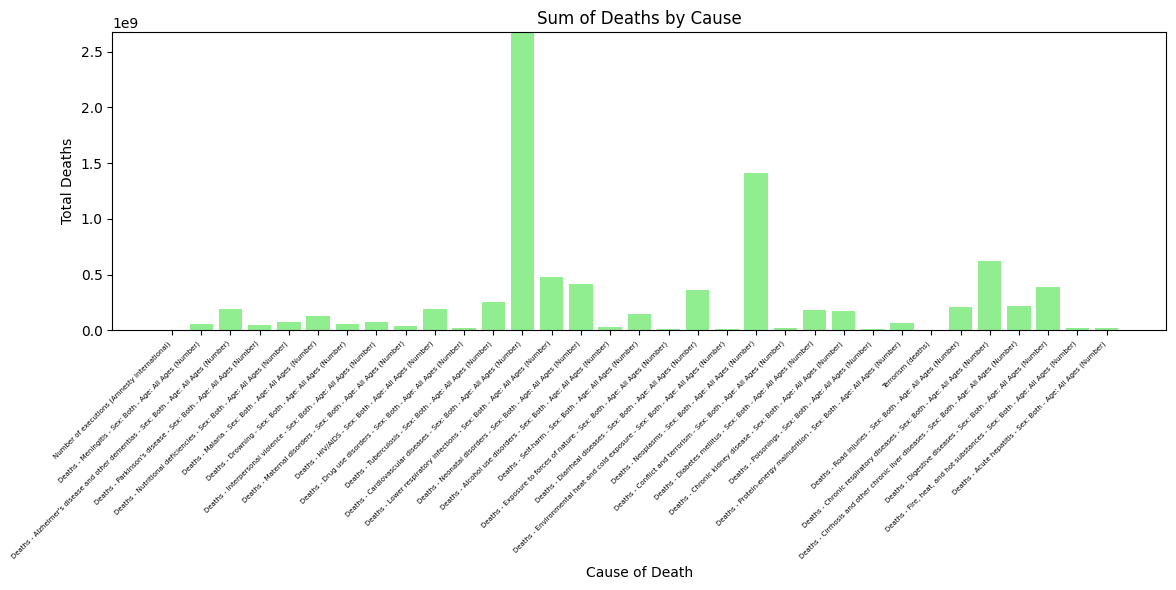

In [26]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(sum_values.index, sum_values.values, color='lightgreen')

# Adding labels and title
plt.title('Sum of Deaths by Cause')
plt.xlabel('Cause of Death')
plt.ylabel('Total Deaths')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right',fontsize=5)
plt.ylim(0, sum_values.max() + 1000)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [27]:
death_columns = df.columns[3:]

In [28]:
yearly_deaths = df.groupby('Year')[death_columns].sum().sum(axis=1)

In [29]:
yearly_deaths_df = pd.DataFrame({'Year': yearly_deaths.index, 'Total Deaths': yearly_deaths.values})

In [30]:
X = yearly_deaths_df[['Year']]  # Independent variable
y = yearly_deaths_df['Total Deaths']  # Dependent variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = model.score(X_test, y_test)
print("R-squared value:", r_squared)



R-squared value: 0.9641890402994652


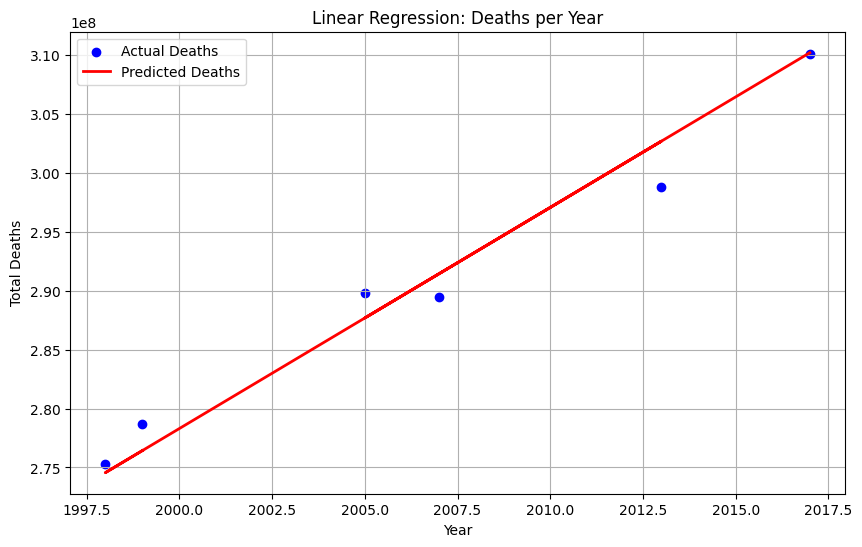

In [32]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Deaths')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Deaths')
plt.title('Linear Regression: Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid()
plt.show()

In [36]:
# Assuming you want to predict for the year 2023
year_to_predict = 2023

# Create a new input dataset for prediction
country_data_for_prediction = pd.DataFrame({'Year': [year_to_predict] * len(country_totals)})

# Make predictions
country_totals['Predicted Total Deaths'] = model1.predict(country_data_for_prediction)

In [37]:
country_totals = df.groupby('Entity').sum().reset_index()

In [38]:
country_totals['Total Deaths'] = country_totals[death_columns].sum(axis=1)

In [40]:
# Step 3: Train the Linear Regression Model
model1 = LinearRegression()
model1.fit(X, y)

# Create a DataFrame for predictions with the 'Year' column
prediction_data = pd.DataFrame({'Year': country_totals['Year']})

# Step 4: Make Predictions using the prediction_data
country_totals['Predicted Total Deaths'] = model1.predict(prediction_data)